  ## Study Material
  
  
  https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9
   
   https://keras.io/api/
   
   https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e
   
   https://www.youtube.com/playlist?list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn

__First we import all the necessary libraries for this assignment__

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [12]:
img = image.load_img('train/CNV/CNV-1016042-111.jpeg')

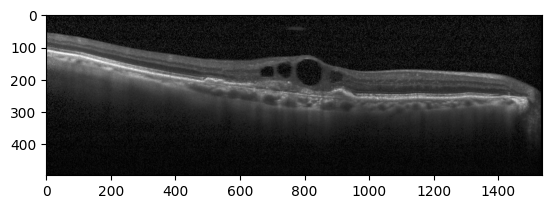

In [14]:
plt.imshow(img)

In [15]:
cv2.imread('train/CNV/CNV-1016042-111.jpeg')

array([[[ 2,  2,  2],
        [ 0,  0,  0],
        [ 6,  6,  6],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [13, 13, 13],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 7,  7,  7],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[10, 10, 10],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[14, 14, 14],
        [ 4,  4,  4],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1]]], dtype=uint8)

 ## Preprocessing
 ImageDataGenerator 
 specific tool for image data preprocessing and augmentation in deep learning

In [10]:
train = ImageDataGenerator(rescale = 1/255)
validation=ImageDataGenerator(rescale = 1/255)

In [11]:
train_dataset = train.flow_from_directory('train',
                                          target_size = (100,100),
                                          batch_size = 64,
                                          class_mode='categorical')

validation_dataset = validation.flow_from_directory('validation',
                                          target_size = (100,100),
                                          batch_size = 64,
                                          class_mode='categorical')

Found 20000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [12]:
# Classes
class_names = list(train_dataset.class_indices.keys())
class_names

['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [13]:
label_to_class_name = dict(zip(range(len(train_dataset.class_indices)), train_dataset.class_indices))
label_to_class_name

{0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

In [19]:
path = "train"
for i in ['CNV',"DME",'DRUSEN','NORMAL']:
  new_path = path + "/" + i
  for j in os.listdir(new_path):
    new = new_path + "/" + j
    img = cv2.imread(new)
    try:
      x = img.shape
    except:
      print(new)

In [10]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3])

## Defining different models

##  1.VGG 16 MODEL

In [6]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(100,100,3)
)

__Genereally we freeze  all the convolution layer of base model but here  i trained the 5th layer of convolution layer of base model so that  my model easily learn the parameters__

In [7]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [12]:
# Define the model architecture
model1 = Sequential()
model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(4, activation='softmax'))

__This is the summaary of VGG16 model__

In [13]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               1179904   
                                                                 
 dense_9 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 15,895,620
Trainable params: 8,260,356
Non-trainable params: 7,635,264
_________________________________________________________________


In [14]:
model1.compile(
    optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

__EarlyStopping helps to reduce overfitting__

In [6]:
Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=8,
    verbose=2,
    restore_best_weights='True',
    mode='auto'
    
    
)

In [15]:

history1 = model1.fit(train_dataset,
                      epochs=10,callbacks=[Early_Stopping],
                      validation_data=validation_dataset)

Epoch 1/10
313/313 [==============================] - 1161s 4s/step - loss: 1.2137 - accuracy: 0.5628 - val_loss: 0.6079 - val_accuracy: 0.7688
Epoch 2/10
313/313 [==============================] - 1122s 4s/step - loss: 0.5567 - accuracy: 0.7845 - val_loss: 0.5741 - val_accuracy: 0.7793
Epoch 3/10
313/313 [==============================] - 1127s 4s/step - loss: 0.4565 - accuracy: 0.8299 - val_loss: 0.4527 - val_accuracy: 0.8393
Epoch 4/10
313/313 [==============================] - 1126s 4s/step - loss: 0.4000 - accuracy: 0.8526 - val_loss: 0.4520 - val_accuracy: 0.8380
Epoch 5/10
313/313 [==============================] - 1117s 4s/step - loss: 0.3639 - accuracy: 0.8692 - val_loss: 0.4065 - val_accuracy: 0.8543
Epoch 6/10
313/313 [==============================] - 1115s 4s/step - loss: 0.3272 - accuracy: 0.8820 - val_loss: 0.4266 - val_accuracy: 0.8593
Epoch 7/10
313/313 [==============================] - 1082s 3s/step - loss: 0.2963 - accuracy: 0.8927 - val_loss: 0.4564 - val_accuracy:

## From the above, the Accuracy of the VGG16 model is 0.8633

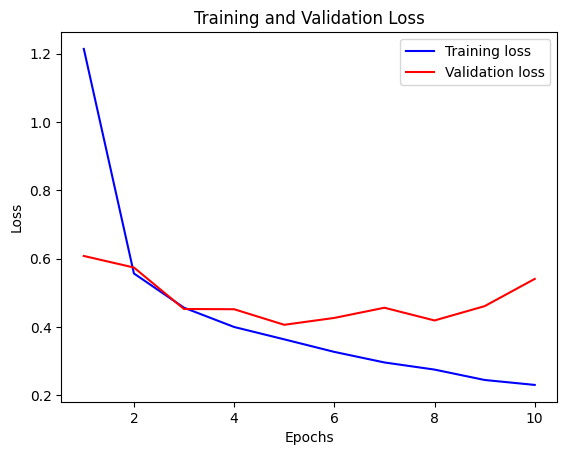

In [16]:
import matplotlib.pyplot as plt

loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
# Save the trained model
import pickle

# Save model1 as a pickle file
model1_pkl_file = "model1.pkl"

with open(model1_pkl_file, 'wb') as file:
    pickle.dump(model1, file)


In [9]:
import pickle

# Load the model from the .pkl file
with open('model1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Save the weights of the VGG16-based model
model1.save_weights('vgg16_model.h5')

In [20]:
loaded_model.predict(validation_dataset)

63/63 [==============================] - 205s 3s/step


array([[4.5236726e-03, 1.8619886e-02, 4.3575189e-01, 5.4110456e-01],
       [5.9171489e-05, 6.4316380e-04, 3.9556343e-02, 9.5974129e-01],
       [1.4571073e-04, 1.7418507e-03, 4.9679566e-02, 9.4843286e-01],
       ...,
       [9.8899394e-01, 5.1905158e-07, 1.1005601e-02, 2.0476773e-12],
       [2.9405546e-03, 2.0260154e-03, 1.6222699e-02, 9.7881079e-01],
       [1.5171462e-13, 2.2334214e-09, 8.3716296e-09, 1.0000000e+00]],
      dtype=float32)

In [21]:
validation_dataset.labels

array([0, 0, 0, ..., 3, 3, 3])

In [39]:
# Save the weights of the VGG16-based model
model1.save_weights('vgg16_weights.h5')

## 2. ResNet50

In [26]:
from tensorflow.keras.applications import VGG16, ResNet50
def create_resnet_based_model():
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [27]:
model_resnet = create_resnet_based_model()
model_resnet.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
313/313 [==============================] - 2522s 8s/step - loss: 0.7943 - accuracy: 0.7585 - val_loss: 1.7436 - val_accuracy: 0.2500
Epoch 2/10
313/313 [==============================] - 1943s 6s/step - loss: 0.3408 - accuracy: 0.8829 - val_loss: 1.4825 - val_accuracy: 0.2792
Epoch 3/10
313/313 [==============================] - 1896s 6s/step - loss: 0.2903 - accuracy: 0.9002 - val_loss: 2.4295 - val_accuracy: 0.3997
Epoch 4/10
313/313 [==============================] - 2496s 8s/step - loss: 0.2451 - accuracy: 0.9160 - val_loss: 0.4855 - val_accuracy: 0.8322
Epoch 5/10
313/313 [==============================] - 38015s 122s/step - loss: 0.2182 - accuracy: 0.9260 - val_loss: 1.0891 - val_accuracy: 0.7542
Epoch 6/10
313/313 [==============================] - 4961s 16s/step - loss: 0.1953 - accuracy: 0.9312 - val_loss: 0.7158 - val_accuracy: 0.7700
Epoch 7/10
313/313 [==============================] - 1982s 6s/step - loss: 0.1726 - accuracy: 0.9399 - val_loss: 0.5109 - val_accur

__Accuracy of  resnet model is 0.8503__

In [30]:
from tensorflow.keras.models import load_model

# Saving Keras model to an HDF5 file
model_resnet.save("model_resnet.h5")

# for loading the model from the same file
#loaded_model = load_model("model_resnet.h5")


# Save the model weights to a file
model_resnet.save_weights("model_resnet_weights.h5")

In [ ]:
import h5py

# Open the HDF5 file
with h5py.File("model_resnet_weights.h5", "r") as file:
    # List all groups and datasets in the file
    def print_all_items(name, obj):
        print(name)

    file.visititems(print_all_items)


## 3. MobileNet

In [9]:
def create_mobilenet_based_model(activation='relu'):
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation=activation))
    model.add(Dense(4, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [21]:
model_relu = create_mobilenet_based_model(activation='relu')

In [23]:
mobilenet = model_relu.fit(train_dataset,validation_data=validation_dataset,
                                callbacks=[Early_Stopping], epochs=10
                                )

Epoch 1/10
313/313 [==============================] - 757s 2s/step - loss: 0.7662 - accuracy: 0.7935 - val_loss: 0.6213 - val_accuracy: 0.8048
Epoch 2/10
313/313 [==============================] - 583s 2s/step - loss: 0.3065 - accuracy: 0.8910 - val_loss: 0.3806 - val_accuracy: 0.8808
Epoch 3/10
313/313 [==============================] - 597s 2s/step - loss: 0.2498 - accuracy: 0.9121 - val_loss: 0.4615 - val_accuracy: 0.8292
Epoch 4/10
313/313 [==============================] - 873s 3s/step - loss: 0.2006 - accuracy: 0.9294 - val_loss: 0.4084 - val_accuracy: 0.8700
Epoch 5/10
313/313 [==============================] - 572s 2s/step - loss: 0.1716 - accuracy: 0.9411 - val_loss: 0.3261 - val_accuracy: 0.8857
Epoch 6/10
313/313 [==============================] - 1088s 3s/step - loss: 0.1524 - accuracy: 0.9452 - val_loss: 0.3542 - val_accuracy: 0.8823
Epoch 7/10
313/313 [==============================] - 633s 2s/step - loss: 0.1263 - accuracy: 0.9560 - val_loss: 0.4473 - val_accuracy: 0.881

__Accuracy of mobilenet model is 0.8815__

| Model Name     | Validation Accuracy |
|----------------|---------------------|
| VGG16          |  0.8633             |
| ResNet         |  0.8503             |
| MobileNet      |  0.8815             |


__By comparing all these model we can choose MobileNet  for My final Prediction of test dataset__

## Now ,I will try out  other techniques so to increase the val_accuracy of MobileNet model 

__1. Let's try different activation function on this model__

Most commonly used  in hidden layers; they are:

     Rectified Linear Activation (ReLU)
     Logistic (Sigmoid)
     Hyperbolic Tangent (Tanh)


In [49]:
model_tanh = create_mobilenet_based_model(activation='tanh')
mobilenet_tanh = model_tanh.fit(train_dataset,validation_data=validation_dataset,
                                callbacks=[Early_Stopping], epochs=10
                                )

Epoch 1/10
313/313 [==============================] - 448s 1s/step - loss: 0.5264 - accuracy: 0.8115 - val_loss: 0.4786 - val_accuracy: 0.8170
Epoch 2/10
313/313 [==============================] - 423s 1s/step - loss: 0.3758 - accuracy: 0.8669 - val_loss: 0.6367 - val_accuracy: 0.7680
Epoch 3/10
313/313 [==============================] - 431s 1s/step - loss: 0.3543 - accuracy: 0.8791 - val_loss: 0.4451 - val_accuracy: 0.8593
Epoch 4/10
313/313 [==============================] - 434s 1s/step - loss: 0.3547 - accuracy: 0.8801 - val_loss: 0.3558 - val_accuracy: 0.8790
Epoch 5/10
313/313 [==============================] - 416s 1s/step - loss: 0.3498 - accuracy: 0.8801 - val_loss: 0.6227 - val_accuracy: 0.7940
Epoch 6/10
313/313 [==============================] - 437s 1s/step - loss: 0.3591 - accuracy: 0.8768 - val_loss: 1.0722 - val_accuracy: 0.7265
Epoch 7/10
313/313 [==============================] - 421s 1s/step - loss: 0.3524 - accuracy: 0.8796 - val_loss: 0.3894 - val_accuracy: 0.8773

In [53]:
model_sigmoid = create_mobilenet_based_model(activation='sigmoid')
mobilenet_sigmoid = model_sigmoid.fit(train_dataset,validation_data=validation_dataset,
                                callbacks=[Early_Stopping], epochs=10
                                )

Epoch 1/10
313/313 [==============================] - 425s 1s/step - loss: 0.4677 - accuracy: 0.8327 - val_loss: 0.7797 - val_accuracy: 0.7690
Epoch 2/10
313/313 [==============================] - 441s 1s/step - loss: 0.3235 - accuracy: 0.8870 - val_loss: 0.3828 - val_accuracy: 0.8668
Epoch 3/10
313/313 [==============================] - 417s 1s/step - loss: 0.2825 - accuracy: 0.9018 - val_loss: 0.5161 - val_accuracy: 0.8152
Epoch 4/10
313/313 [==============================] - 428s 1s/step - loss: 0.2586 - accuracy: 0.9115 - val_loss: 0.4853 - val_accuracy: 0.8253
Epoch 5/10
313/313 [==============================] - 423s 1s/step - loss: 0.2518 - accuracy: 0.9148 - val_loss: 0.3150 - val_accuracy: 0.8978
Epoch 6/10
313/313 [==============================] - 409s 1s/step - loss: 0.2446 - accuracy: 0.9176 - val_loss: 0.3539 - val_accuracy: 0.8863
Epoch 7/10
313/313 [==============================] - 398s 1s/step - loss: 0.2241 - accuracy: 0.9231 - val_loss: 0.4059 - val_accuracy: 0.8712

Here,i tried different activation function in combination with output layer activation function "softmax" 
|combibnation    | Validation Accuracy |
|----------------|---------------------|
| Relu           |  0.8815             |
| tanh           |  0.8765             |
| sigmoid        |  0.8712             |

__From table it is evident that for this problem "relu " works better__

## Performance plot 

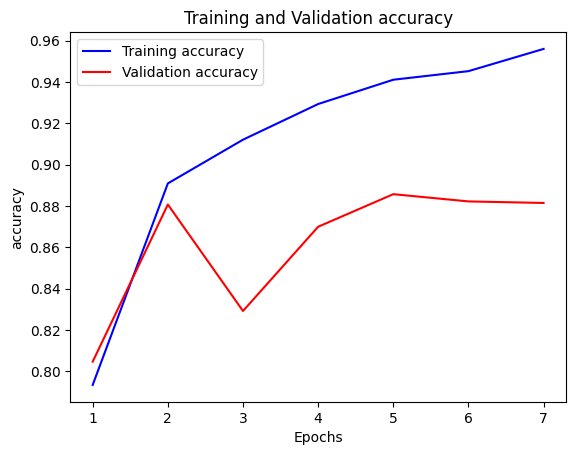

In [27]:
loss = mobilenet.history['accuracy']
val_loss = mobilenet.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

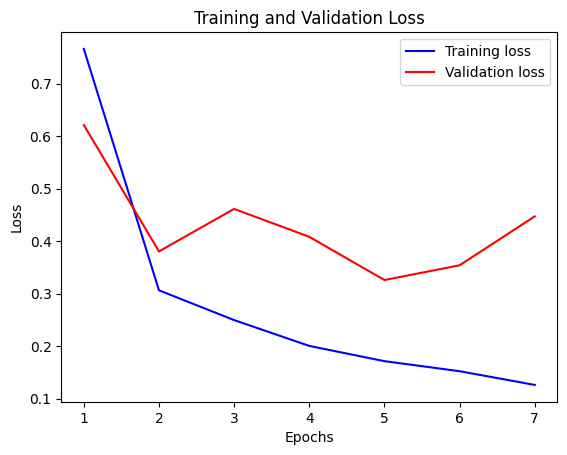

In [24]:
import matplotlib.pyplot as plt

loss = mobilenet.history['loss']
val_loss = mobilenet.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

These graphs  shows  the distribution of losses and accuracy  in validation and training  datasets
from this we can easily see that epoch 2 is best  for this model ,as in epoch 2 val_accuracy and accuracy has less difference and also in loss

__2.vary the learning rate OR use learning rate schedule__ 

In [11]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )
    
model_lrs = Sequential()
model_lrs.add(base_model)
model_lrs.add(Flatten())
model_lrs.add(Dense(256,'relu'))
model_lrs.add(Dense(4, activation='softmax'))
    
    
# Define the initial learning rates and decay rate
initial_learning_rates = [0.01,0.05,0.001,0.005,]
decay_steps = 100  # Adjust this as needed
decay_rate = 0.7  # Adjust this as needed

# Create an ExponentialDecay learning rate schedule for each initial learning rate
learning_rate_schedules = [ExponentialDecay(
    initial_learning_rate,
    decay_steps,
    decay_rate
) for initial_learning_rate in initial_learning_rates]

# Create and compile a model for each learning rate
models = []
for learning_rate_schedule in learning_rate_schedules:
    model_lrs = create_mobilenet_based_model(activation='relu')  # Modify this as needed
    model_lrs.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate_schedule),
        metrics=['accuracy']
    )
    models.append(model_lrs)

In [12]:
# Train each model separately
history = []
for i, model in enumerate(models):
    print(f"Training model with initial learning rate: {initial_learning_rates[i]}")
    model_history = model.fit(
        train_dataset,
        validation_data=validation_dataset,
        callbacks=[Early_Stopping],
        epochs=17
    )
    history.append(model_history)

Training model with initial learning rate: 0.01
Epoch 1/17
313/313 [==============================] - 501s 2s/step - loss: 2.0633 - accuracy: 0.5969 - val_loss: 1.3983 - val_accuracy: 0.5853
Epoch 2/17
313/313 [==============================] - 430s 1s/step - loss: 0.4392 - accuracy: 0.8412 - val_loss: 0.3650 - val_accuracy: 0.8698
Epoch 3/17
313/313 [==============================] - 659s 2s/step - loss: 0.3296 - accuracy: 0.8824 - val_loss: 0.3588 - val_accuracy: 0.8705
Epoch 4/17
313/313 [==============================] - 419s 1s/step - loss: 0.2809 - accuracy: 0.9015 - val_loss: 0.3181 - val_accuracy: 0.8915
Epoch 5/17
313/313 [==============================] - 401s 1s/step - loss: 0.2550 - accuracy: 0.9099 - val_loss: 0.3146 - val_accuracy: 0.8885
Epoch 6/17
313/313 [==============================] - 408s 1s/step - loss: 0.2458 - accuracy: 0.9150 - val_loss: 0.3111 - val_accuracy: 0.8898
Epoch 7/17
313/313 [==============================] - 415s 1s/step - loss: 0.2416 - accuracy: 

| learning rate  | Validation Accuracy |
|----------------|---------------------|
| 0.01           |  0.8913             |
| 0.05           |  0.5847             | 
| 0.001          |  0.9038             |
| 0.005          |  0.9107            |

__from the table it is clear that model with learning rate = 0.005 is best from other three.
So, i will a choose model with learning schedule and learning rate=0.005__

__3. Add regularization__

In [17]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

def mobilenet_regular_based_model():
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(100, 100, 3)
    )
    learning_rate_schedules = [ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=100,
    decay_rate=0.7
    )]
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
    model.add(Dense(4, activation='softmax'))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate_schedule),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [18]:
regularised_model=mobilenet_regular_based_model()
regualr_mobilenet = regularised_model.fit(train_dataset,validation_data=validation_dataset,
                                callbacks=[Early_Stopping], epochs=20
                                )

Epoch 1/20
313/313 [==============================] - 718s 2s/step - loss: 1.1896 - accuracy: 0.7139 - val_loss: 0.7206 - val_accuracy: 0.7943
Epoch 2/20
313/313 [==============================] - 555s 2s/step - loss: 0.5211 - accuracy: 0.8732 - val_loss: 0.4318 - val_accuracy: 0.8950
Epoch 3/20
313/313 [==============================] - 524s 2s/step - loss: 0.3936 - accuracy: 0.9125 - val_loss: 0.3990 - val_accuracy: 0.9000
Epoch 4/20
313/313 [==============================] - 395s 1s/step - loss: 0.3293 - accuracy: 0.9317 - val_loss: 0.3974 - val_accuracy: 0.9053
Epoch 5/20
313/313 [==============================] - 424s 1s/step - loss: 0.3023 - accuracy: 0.9394 - val_loss: 0.3962 - val_accuracy: 0.9085
Epoch 6/20
313/313 [==============================] - 358s 1s/step - loss: 0.2939 - accuracy: 0.9435 - val_loss: 0.3982 - val_accuracy: 0.9078
Epoch 7/20
313/313 [==============================] - 465s 1s/step - loss: 0.2907 - accuracy: 0.9445 - val_loss: 0.3989 - val_accuracy: 0.9095

In [20]:
# Saving Keras model to an HDF5 file
regularised_model.save("regularised_model.h5")
# Save the model weights to a file
regularised_model.save_weights("regularised_model_weights.h5")

Let's check the  what types of file in the test folder

In [49]:
import os

# Define the directory where your 'test' directory is located
test_directory = 'test'

# Use os.listdir to get a list of files and directories in the 'test' directory
contents = os.listdir(test_directory)

# Print the list of contents
for item in contents:
    print(item)


1.jpg
10.jpg
100.jpg
1000.jpg
10000.jpg
1001.jpg
1002.jpg
1003.jpg
1004.jpg
1005.jpg
1006.jpg
1007.jpg
1008.jpg
1009.jpg
101.jpg
1010.jpg
1011.jpg
1012.jpg
1013.jpg
1014.jpg
1015.jpg
1016.jpg
1017.jpg
1018.jpg
1019.jpg
102.jpg
1020.jpg
1021.jpg
1022.jpg
1023.jpg
1024.jpg
1025.jpg
1026.jpg
1027.jpg
1028.jpg
1029.jpg
103.jpg
1030.jpg
1031.jpg
1032.jpg
1033.jpg
1034.jpg
1035.jpg
1036.jpg
1037.jpg
1038.jpg
1039.jpg
104.jpg
1040.jpg
1041.jpg
1042.jpg
1043.jpg
1044.jpg
1045.jpg
1046.jpg
1047.jpg
1048.jpg
1049.jpg
105.jpg
1050.jpg
1051.jpg
1052.jpg
1053.jpg
1054.jpg
1055.jpg
1056.jpg
1057.jpg
1058.jpg
1059.jpg
106.jpg
1060.jpg
1061.jpg
1062.jpg
1063.jpg
1064.jpg
1065.jpg
1066.jpg
1067.jpg
1068.jpg
1069.jpg
107.jpg
1070.jpg
1071.jpg
1072.jpg
1073.jpg
1074.jpg
1075.jpg
1076.jpg
1077.jpg
1078.jpg
1079.jpg
108.jpg
1080.jpg
1081.jpg
1082.jpg
1083.jpg
1084.jpg
1085.jpg
1086.jpg
1087.jpg
1088.jpg
1089.jpg
109.jpg
1090.jpg
1091.jpg
1092.jpg
1093.jpg
1094.jpg
1095.jpg
1096.jpg
1097.jpg
1098.jpg
1099.j

## using a random example.Let's check prediction of different models

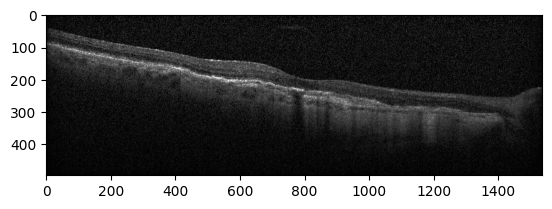

1/1 [==============================] - 0s 32ms/step


'CNV'

In [45]:
img = cv2.imread('test/9830.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (100,100))
yhat = regularised_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

In [37]:
from tensorflow.keras.models import load_model
# for loading the model from the same file
loaded_model_resnet = load_model("model_resnet.h5")

In [46]:
y_p = loaded_model_resnet.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(y_p )
label_to_class_name[max_index]

1/1 [==============================] - 0s 50ms/step


'CNV'

In [47]:
loaded_model_VGG16 = load_model("vgg16_model.h5")
y_p = loaded_model_VGG16.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(y_p )
label_to_class_name[max_index]

1/1 [==============================] - 0s 158ms/step


'CNV'

Mostof time ensemble of varrious model works better than the single model
so, i will be using __ensemble method__ to predict on my test datasets

In [ ]:
dir_path='test'

from tensorflow.keras.models import load_model

model_vgg16=load_model("vgg16_model.h5")
model_resnet=load_model("model_resnet.h5")
regularised_model=load_model("regularised_model.h5")


# Initialize lists to store predictions and file names
predictions = []
image_paths = []

# Process each image in the 'test' directory
for i in os.listdir(dir_path):
    # Load the image
    img = cv2.imread(os.path.join(dir_path, i))

    # Resize the image to the desired size
    img = cv2.resize(img, (100, 100)) 

    # Preprocess the image
    img = np.expand_dims(img / 255, 0)

    
    # Make predictions using each of the three models
    prediction_resnet = model_resnet.predict(img)
    prediction_VGG16 = model_vgg16.predict(img)
    prediction_regularised = regularised_model.predict(img)

    # Combine predictions (e.g., averaging)
    ensemble_prediction = (prediction_resnet + prediction_VGG16 + prediction_regularised) / 3.0
    # Get the class index with the highest probability
    max_index = np.argmax(ensemble_prediction)
    
    # Append the prediction and file name to lists
    predictions.append(label_to_class_name[max_index])
    image_paths.append(i)


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 229ms/step


1/1 [==============================] - 0s 339ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 352ms/step


1/1 [==============================] - 0s 376ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 408ms/step


1/1 [==============================] - 0s 423ms/step


1/1 [==============================] - 0s 461ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 1s 500ms/step


1/1 [==============================] - 0s 487ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 1s 563ms/step


1/1 [==============================] - 1s 567ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 644ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 1s 672ms/step


1/1 [==============================] - 1s 651ms/step


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 1s 674ms/step


1/1 [==============================] - 1s 790ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 1s 567ms/step


1/1 [==============================] - 1s 612ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 1s 604ms/step


1/1 [==============================] - 1s 611ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 1s 655ms/step


1/1 [==============================] - 1s 603ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 500ms/step


1/1 [==============================] - 1s 502ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 1s 685ms/step


1/1 [==============================] - 1s 565ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 1s 550ms/step


1/1 [==============================] - 0s 453ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 1s 750ms/step


1/1 [==============================] - 1s 719ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 1s 626ms/step


1/1 [==============================] - 1s 781ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 1s 829ms/step


1/1 [==============================] - 1s 743ms/step


1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 1s 830ms/step


1/1 [==============================] - 1s 813ms/step


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 1s 927ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 920ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 1s 996ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 985ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 219ms/step


1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 232ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 244ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 302ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 219ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 312ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 571ms/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 1s 576ms/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 1s 641ms/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 1s 619ms/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 1s 659ms/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 0s 478ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 407ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 429ms/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 836ms/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 1s 699ms/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 1s 875ms/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 1s 954ms/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 1s 865ms/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 649ms/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 1s 558ms/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 1s 519ms/step


1/1 [==============================] - 4s 4s/step


In [ ]:
# Create a DataFrame with only the predicted class
data = {'Predicted Class': predictions}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('predictions.csv', index=False)


__The validation accuracy of the model mobilenet model is 0.91__.But for test i want to use ensemble model for more accuracy of the test result but it  took a lot of time (more than 12 hours) and it still running.so submit the